In [1]:
from sklearn.datasets import make_circles

import numpy as np
import matplotlib.pyplot as plt

### Generar un dataset

In [2]:
x, y = make_circles(n_samples=600, noise=0.1, factor=0.5)

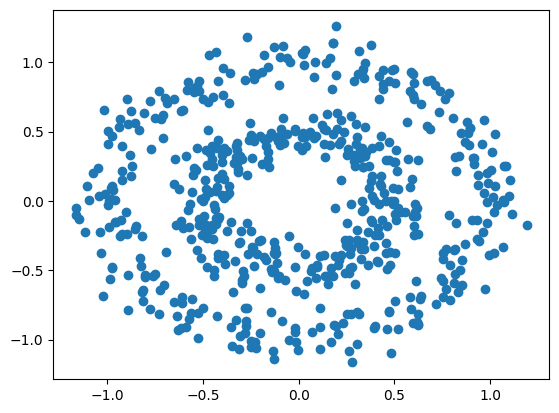

In [3]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [4]:
"""
Clase dedicada a las capas de una red neuronal
"""


class NeuralLayer:
    def __init__(self, n_perceptrons, edges, activation_functions):
        self.n_perceptrons = n_perceptrons
        self.edges = edges
        self.activation_functions = activation_functions
        # Para simplificar un poco el desarrollo, utilizaremos valores aleatorios para el peso
        self.weights = np.random.rand(edges, n_perceptrons) * 2 - 1
        self.slopes = np.random.rand(1, n_perceptrons) * 2 - 1

    def set_weights(self, weights):
        self.weights = weights

    def set_slopes(self, slopes):
        self.slopes = slopes

### Definir la estructura de las funciones de activación

In [5]:
"""
Para este apartado utilizaremos la sigmoidea --> (1 / 1 + e ^ -x), esta función es la que se aplica en el Forward Pass
Para el backpropagation se utiliza la derivada de esta función.

lambda parameter_1, parameter_2, ... , parameter_n: operations (parameter_1 + parameter_2) 
"""
sigmoide = (
    lambda x: 1.0 / (1.0 + np.e ** (-x)),
    lambda x: x * (1.0 - x)
)

### Definimos la topología de nuestra red

In [6]:
parameters = 2
result = 1
topology = [parameters, 3, 4, 2 , result]

### Definimos una función de pérdida

In [7]:
sqr_mean_error = (
    lambda predicted_y, real_y: np.mean((predicted_y - real_y) ** 2),
    lambda predicted_y, real_y: predicted_y - real_y
)

### Inicializamos la red neuronal

In [20]:
def init_neural_network(topology, activation_functions):
    neural_network = []
    for index, layer in enumerate(topology[:-1]):
        neural_network.append(NeuralLayer(
            edges=topology[index + 1],
            n_perceptrons=topology[index],
            activation_functions=activation_functions
        ))
    return neural_network

### Entrenamos nuestra red neuronal

In [21]:
def fit(data_x, data_y, neural_network, loss_function, learning_rate=0.5):
    # Definir una estructura de salida
    #           0       1        0->datos previos 1-> salida
    output = [(None, data_x)]
    # Recorrer las capas de la red neuronal
    for index in enumerate(neural_network):
        # Definir las operaciones del Forward pass
        # En otras palabras aplicamos la suma producto de los datos de entrada por sus pesos y lo pasamos a la unión sumadora.
        # Dicho de otra forma, aplicamos una multiplicación matricial (n x m)(m x o) --> (600, 2)(2, 10)
        weigth_sum = output[-1][1] @ neural_network[index].weights + neural_network[index].slopes
        # Los valores obtenidos de la unión sumadora, pasan a la función de activación
        # sigmoide[0](weights)
        activated = np.vectorize(neural_network[index].activation_functions[0](weigth_sum))
        output.append((weigth_sum, activated))
    # Ahora aplicamos backpropagation
    deltas = []
    # range devuelve una serie numérica comprendida entre el parámetro inicial y el parámetro final - 1
    for position in reversed(range(0, len(neural_network))):
        # Recuperar el último valor arrojado por la capa siguiente
        activated = output[position + 1][1]
        # Si la posición es igual a la última capa, insertamos en el registro de deltas directamente nuestra salida pasada
        # por la función de pérdida
        if(position == len(neural_network) - 1):
            deltas.insert(0, loss_function[1](activated, data_y) * neural_network[position].activation_functions[1](activated))
        # Caso contrario insertamos en los deltas la transpuesta de los pesos calculados en la capa anterior y multiplicando
        # por la salida de la capa siguiente pasada por la función de pérdida
        else:
            deltas.insert(0, deltas[0] @ weight_temp.T * neural_network[position].activation_functions[1](activated))
        # Este auxiliar guarda los pesos de la capa anterior para ser usados en las siguientes iteraciones
        weight_temp = neural_network[position].weigths
        # Aplicamos la técnica de la gradiente descenso para transmitir el error
        neural_network[position].weights = neural_network[position].weights - output[position][1].T @ deltas[0] * learning_rate
        neural_network[position].slopes = neural_network[position].slopes - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate

In [22]:
neural_net = init_neural_network(topology, sigmoide)

In [23]:
neural_net

In [24]:
from IPython.display import clear_output
loss = []
y =  y[:, np.newaxis]
y_predicted = None
for index in range(1500):
    y_predicted = fit(neural_net, x, y, sqr_mean_error, learning_rate=0.15)
    if index % 25 == 0:
        loss.append(sqr_mean_error[0](y_predicted, y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = fit(neural_net, np.array([[x0, x1]]), y, sqr_mean_error, use_train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(x[y[:, 0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
        plt.scatter(x[y[:, 0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)
print(y_predicted)

AttributeError: 'numpy.ndarray' object has no attribute 'weights'